In [1]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import constants
from utils import SessionManager
from GenerateData import generate_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

In [ ]:
vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [7]:
driver = SessionManager()
queries = constants.queries_dict
def get_data():
    pagerank = driver.bring_data(queries['page_rank'])
    degree = driver.bring_data(queries['degree'])
    closeness = driver.bring_data(queries['closeness'])
    clustering = driver.bring_data(queries['clustering'])
    data = pd.merge(pagerank, degree, on='name')
    data = pd.merge(data, closeness, on='name')
    data = pd.merge(data, clustering, on='name')
    return data

In [5]:
graph_data = get_graph_data(db_host, db_user, db_password)
data = get_data()
tsp = TSP(graph_data, 'Hub', data)
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))



(['Hub', 'Location1', 'Location3', 'Location4', 'Location2'], 43.0)


In [7]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [500, 800, 1000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=3, multipl=1.5)
best_results

[((1000, 0.3, 10), 43.0, 0.09949159622192383),
 ((500, 0.1, 20), 43.0, 0.11476826667785645),
 ((500, 0.6, 10), 43.0, 0.19868683815002441),
 ((800, 0.3, 20), 43.0, 0.2130289077758789),
 ((500, 0.6, 20), 43.0, 0.4063112735748291),
 ((500, 0.3, 40), 43.0, 0.4108409881591797),
 ((800, 0.3, 40), 43.0, 0.4186732769012451),
 ((800, 0.6, 20), 43.0, 0.4485459327697754),
 ((1000, 0.3, 40), 43.0, 0.4675018787384033),
 ((1000, 0.6, 20), 43.0, 0.6177656650543213),
 ((500, 0.6, 40), 43.0, 0.8451263904571533),
 ((800, 0.6, 40), 43.0, 0.8927006721496582),
 ((1000, 0.6, 40), 43.0, 1.1385045051574707),
 ((500, 0.3, 10), 45.0, 0.10075664520263672),
 ((800, 0.3, 10), 45.0, 0.10254669189453125),
 ((800, 0.1, 20), 45.0, 0.10437822341918945),
 ((500, 0.3, 20), 45.0, 0.20189976692199707),
 ((1000, 0.1, 40), 45.0, 0.2087702751159668),
 ((800, 0.1, 40), 45.0, 0.21448707580566406),
 ((800, 0.6, 10), 45.0, 0.24073123931884766),
 ((1000, 0.6, 10), 45.0, 0.36121511459350586),
 ((1000, 0.1, 10), 46.0, 0.050132989883

(1000, 0.3, 10)


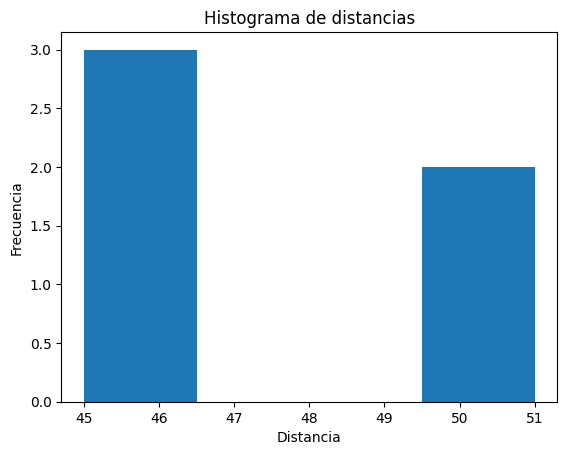

In [8]:
print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])


In [5]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [8]:
graph_data = get_graph_data(db_host, db_user, db_password)
data = get_data()
tsp = TSP(graph_data, 'l1',data)
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=10, initial_temperature=2000, n=8,
                                    cooling_factor=0.4, minimum_temperature=0.99))


(['l1', 'l9', 'l8', 'l10', 'l1', 'l2', 'l4', 'l5', 'l7', 'l14', 'l6', 'l13', 'l4', 'l3', 'l12', 'l11', 'l4', 'l15'], 77.0)


In [9]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.4, 0.7, 0.9],
        'n': [5, 10, 15]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=3)
best_results

[((2000, 0.9, 10), 65.0, 1.3069005012512207),
 ((4000, 0.9, 15), 74.0, 2.343644618988037),
 ((4000, 0.7, 5), 77.0, 0.2135920524597168),
 ((4000, 0.7, 15), 77.0, 0.6595995426177979),
 ((2000, 0.9, 15), 78.0, 1.9969098567962646),
 ((4000, 0.9, 5), 79.0, 0.7168149948120117),
 ((1000, 0.9, 5), 80.0, 0.5781023502349854),
 ((1000, 0.9, 10), 80.0, 1.164757490158081),
 ((4000, 0.9, 10), 80.0, 1.5022187232971191),
 ((1000, 0.7, 15), 83.0, 0.4930546283721924),
 ((1000, 0.4, 15), 84.0, 0.23458242416381836),
 ((2000, 0.7, 15), 84.0, 0.6001152992248535),
 ((1000, 0.9, 15), 84.0, 1.732882022857666),
 ((4000, 0.7, 10), 85.0, 0.4234652519226074),
 ((2000, 0.7, 5), 86.0, 0.19442486763000488),
 ((2000, 0.9, 5), 88.0, 0.674483060836792),
 ((4000, 0.4, 10), 89.0, 0.17836618423461914),
 ((4000, 0.4, 5), 90.0, 0.09032988548278809),
 ((2000, 0.4, 15), 94.0, 0.23521828651428223),
 ((1000, 0.7, 10), 96.0, 0.33730602264404297),
 ((2000, 0.7, 10), 96.0, 0.43814587593078613),
 ((4000, 0.4, 15), 97.0, 0.2697420120

(2000, 0.9, 10)


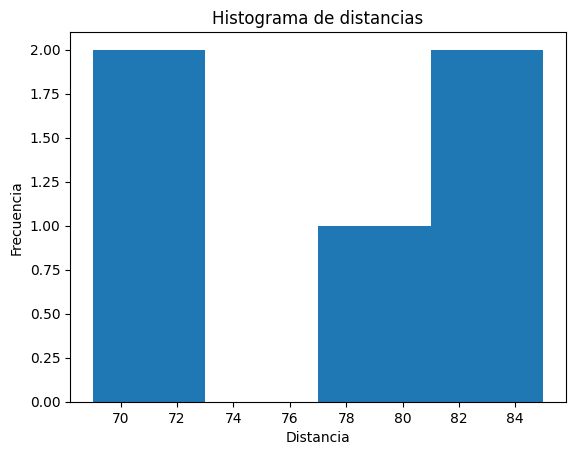

In [10]:
print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])

In [11]:
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print(f"Matriz de tamaño {n}")
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño 5
13.4 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 10
13.4 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 20
13.6 s ± 294 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 40
13.3 s ± 667 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 60
13.7 s ± 279 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
